## Flight Fare prediction using machine learning

In this article, we will be analyzing the flight fare dataset using essential exploratory data analysis techniques then will draw some predictions about the price of the flight based on some features such as what type of airline it is, what is the arrival time, what is the departure time, what is the duration of the flight, source, destination and more.

### Takeaways from the blog

1. EDA: Learn the complete process of EDA
2. Data analysis: Learn to withdraw some insights from the dataset both mathematically and visualize it.
3. Machine learning model: Learn to make a Machine learning model after the data preprocessing steps.
4. Comparing the models: We will be working on multiple models so that we could choose the best one for that we need to know the techniques of how to compare our model to choose the best one so we will be covering that also.

### About the dataset

1. Airline: So this column will have all the types of airlines like Indigo, Jet Airways, Air India, and many more.
2. Date_of_Journey: This column will let us know about the date on which the passenger's journey will start.
3. Source: This column holds the name of the place from where the passenger's journey will start.
4. Destination: This column holds the name of the place to where passengers wanted to travel.
5. Route: Here we can know about that what is the route through which passengers have opted to travel from his/her source to their destination.
6. Arrival_Time: Arrival time is when the passenger will reach his/her destination.
7. Duration: Duration is the whole time period that a flight will take to complete its journey from source to destination.
8. Total_Stops: This will let us know in how many places flights will stop there for the flight in the whole journey.
9. Additional_Info: In this column, we will get information about food, kind of food, and other amenities.
10. Price: Price of the flight for a complete journey including all the expenses before onboarding.

### Importing Libraries

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score
from math import sqrt
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

from prettytable import PrettyTable

### Reading the training data of our dataset

In [2]:
train_df = pd.read_excel("Data_Train.xlsx")
train_df.head(10)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
5,SpiceJet,24/06/2019,Kolkata,Banglore,CCU → BLR,09:00,11:25,2h 25m,non-stop,No info,3873
6,Jet Airways,12/03/2019,Banglore,New Delhi,BLR → BOM → DEL,18:55,10:25 13 Mar,15h 30m,1 stop,In-flight meal not included,11087
7,Jet Airways,01/03/2019,Banglore,New Delhi,BLR → BOM → DEL,08:00,05:05 02 Mar,21h 5m,1 stop,No info,22270
8,Jet Airways,12/03/2019,Banglore,New Delhi,BLR → BOM → DEL,08:55,10:25 13 Mar,25h 30m,1 stop,In-flight meal not included,11087
9,Multiple carriers,27/05/2019,Delhi,Cochin,DEL → BOM → COK,11:25,19:15,7h 50m,1 stop,No info,8625


### Exploratory Data Analysis (EDA)

In [3]:
# Now here we will be looking at the kind of columns our dataset have
train_df.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [4]:
# Here we can get more information about our dataset
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [5]:
# To know more about the dataset
train_df.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [61]:
# Now while using the isnull function we will gonna see about the number of null values in our dataset
train_df.isnull().head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [7]:
# Now while using the isnull function and sum function we will gonna see about the number of null values in our dataset
train_df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [8]:
# Dropping NAN values
train_df.dropna(inplace = True)

In [62]:
# Duplicate values
train_df[train_df.duplicated()].head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min
6805,Vistara,Banglore,New Delhi,BLR → DEL,175,non-stop,No info,7608,3,3,21,10,0,5
8733,Air Asia,Banglore,New Delhi,BLR → DEL,165,non-stop,No info,4482,24,3,23,25,2,10


In [10]:
# Here we will be removing those repeated values from the dataset and keeping the in-place attribute to be true so that there will be no changes.
train_df.drop_duplicates(keep='first',inplace=True)

In [11]:
train_df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [12]:
train_df.shape

(10462, 11)

In [13]:
# Checking the Additional_info column and having the count of unique type of values
train_df["Additional_Info"].value_counts()

No info                         8182
In-flight meal not included     1926
No check-in baggage included     318
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
1 Short layover                    1
2 Long layover                     1
Red-eye flight                     1
Name: Additional_Info, dtype: int64

In [14]:
# Checking the different Airlines
train_df["Airline"].unique()

array(['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia',
       'Vistara Premium economy', 'Jet Airways Business',
       'Multiple carriers Premium economy', 'Trujet'], dtype=object)

In [15]:
train_df["Airline"].value_counts()

Jet Airways                          3700
IndiGo                               2043
Air India                            1694
Multiple carriers                    1196
SpiceJet                              815
Vistara                               478
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

In [16]:
# Checking the different Airline Routes 
train_df["Route"].unique()

array(['BLR → DEL', 'CCU → IXR → BBI → BLR', 'DEL → LKO → BOM → COK',
       'CCU → NAG → BLR', 'BLR → NAG → DEL', 'CCU → BLR',
       'BLR → BOM → DEL', 'DEL → BOM → COK', 'DEL → BLR → COK',
       'MAA → CCU', 'CCU → BOM → BLR', 'DEL → AMD → BOM → COK',
       'DEL → PNQ → COK', 'DEL → CCU → BOM → COK', 'BLR → COK → DEL',
       'DEL → IDR → BOM → COK', 'DEL → LKO → COK',
       'CCU → GAU → DEL → BLR', 'DEL → NAG → BOM → COK',
       'CCU → MAA → BLR', 'DEL → HYD → COK', 'CCU → HYD → BLR',
       'DEL → COK', 'CCU → DEL → BLR', 'BLR → BOM → AMD → DEL',
       'BOM → DEL → HYD', 'DEL → MAA → COK', 'BOM → HYD',
       'DEL → BHO → BOM → COK', 'DEL → JAI → BOM → COK',
       'DEL → ATQ → BOM → COK', 'DEL → JDH → BOM → COK',
       'CCU → BBI → BOM → BLR', 'BLR → MAA → DEL',
       'DEL → GOI → BOM → COK', 'DEL → BDQ → BOM → COK',
       'CCU → JAI → BOM → BLR', 'CCU → BBI → BLR', 'BLR → HYD → DEL',
       'DEL → TRV → COK', 'CCU → IXR → DEL → BLR',
       'DEL → IXU → BOM → COK', 'CCU 

In [17]:
# Now let's look at our testing dataset
test_df = pd.read_excel("Test_set.xlsx")
test_df.head(10)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info
5,Jet Airways,12/06/2019,Delhi,Cochin,DEL → BOM → COK,18:15,12:35 13 Jun,18h 20m,1 stop,In-flight meal not included
6,Air India,12/03/2019,Banglore,New Delhi,BLR → TRV → DEL,07:30,22:35,15h 5m,1 stop,No info
7,IndiGo,1/05/2019,Kolkata,Banglore,CCU → HYD → BLR,15:15,20:30,5h 15m,1 stop,No info
8,IndiGo,15/03/2019,Kolkata,Banglore,CCU → BLR,10:10,12:55,2h 45m,non-stop,No info
9,Jet Airways,18/05/2019,Kolkata,Banglore,CCU → BOM → BLR,16:30,22:35,6h 5m,1 stop,No info


In [18]:
# Now here we will be looking at the kind of columns our testing data have 
test_df.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info'],
      dtype='object')

In [19]:
# Information about the dataset
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          2671 non-null   object
 1   Date_of_Journey  2671 non-null   object
 2   Source           2671 non-null   object
 3   Destination      2671 non-null   object
 4   Route            2671 non-null   object
 5   Dep_Time         2671 non-null   object
 6   Arrival_Time     2671 non-null   object
 7   Duration         2671 non-null   object
 8   Total_Stops      2671 non-null   object
 9   Additional_Info  2671 non-null   object
dtypes: object(10)
memory usage: 208.8+ KB


In [20]:
# To know more about the dataset
test_df.describe()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
count,2671,2671,2671,2671,2671,2671,2671,2671,2671,2671
unique,11,44,5,6,100,199,704,320,5,6
top,Jet Airways,9/05/2019,Delhi,Cochin,DEL → BOM → COK,10:00,19:00,2h 50m,1 stop,No info
freq,897,144,1145,1145,624,62,113,122,1431,2148


In [63]:
# Now while using the isnull function we will gonna see about the number of null values in our testing data
test_df.isnull().head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False


In [22]:
# Now while using the isnull function and sum function we will gonna see about the number of null values in our testing data
test_df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
dtype: int64

### Data Visualization

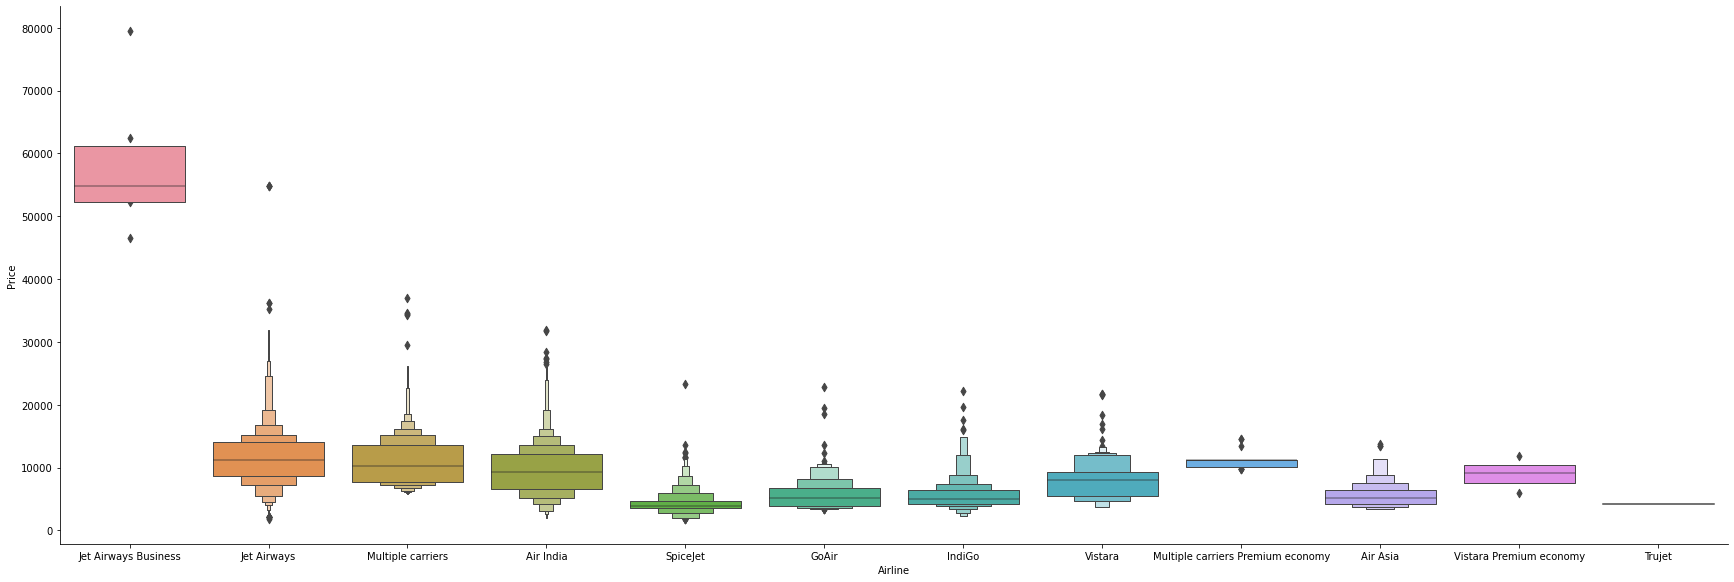

In [23]:
# Plotting Price vs Airline plot
sns.catplot(y = "Price", x = "Airline", data = train_df.sort_values("Price", ascending = False), kind="boxen", height = 8, aspect = 3)
plt.show()

Inference: Here with the help of catplot we are trying to plot the boxplot between the price of the flight and airline and we can draw the conclusion that Jet airways has the most outliers in terms of price.

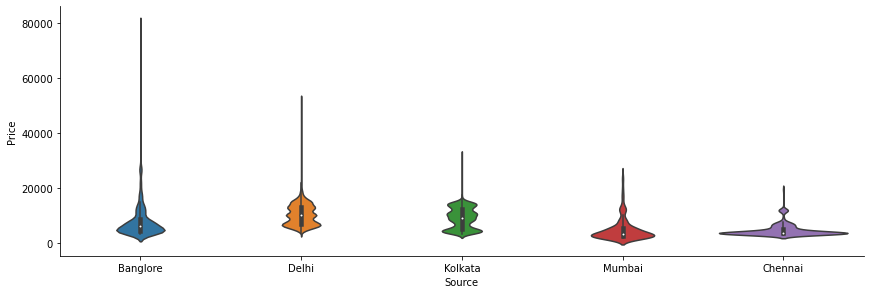

In [24]:
# Plotting Violin plot for Price vs Source
sns.catplot(y = "Price", x = "Source", data = train_df.sort_values("Price", ascending = False), kind="violin", height = 4, aspect = 3)
plt.show()

Inference: Now with the help of catplot only we are plotting a box plot between the price of the flight and the source place i.e. the place from where passengers will travel to the destination and we can see that Banglore as the source location has the most outliers while Chennai has the least.

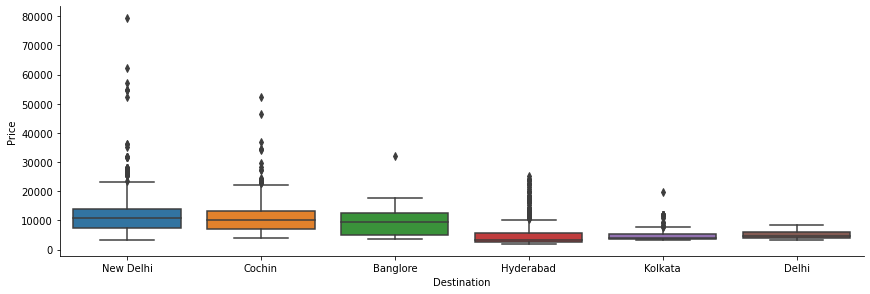

In [25]:
# Plotting Box plot for Price vs Destination
sns.catplot(y = "Price", x = "Destination", data = train_df.sort_values("Price", ascending = False), kind="box", height = 4, aspect = 3)
plt.show()

Inference: Here we are plotting the box plot with the help of catplot between price of the flight and destination to which passenger is travelling to and figured out that New delhi has the most outliers and Kolkata has the least

### Feature Engineering

In [26]:
train_df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [27]:
# Dividing data into features and labels
# Duration convert hours in minutes

train_df['Duration'] = train_df['Duration'].str.replace("h", '*60').str.replace(' ','+').str.replace('m','*1').apply(eval)
test_df['Duration'] = test_df['Duration'].str.replace("h", '*60').str.replace(' ','+').str.replace('m','*1').apply(eval)

In [28]:
# Date_of_Journey
train_df["Journey_day"] = train_df['Date_of_Journey'].str.split('/').str[0].astype(int)
train_df["Journey_month"] = train_df['Date_of_Journey'].str.split('/').str[1].astype(int)
train_df.drop(["Date_of_Journey"], axis = 1, inplace = True)

# Dep_Time
train_df["Dep_hour"] = pd.to_datetime(train_df["Dep_Time"]).dt.hour
train_df["Dep_min"] = pd.to_datetime(train_df["Dep_Time"]).dt.minute
train_df.drop(["Dep_Time"], axis = 1, inplace = True)

# Arrival_Time
train_df["Arrival_hour"] = pd.to_datetime(train_df.Arrival_Time).dt.hour
train_df["Arrival_min"] = pd.to_datetime(train_df.Arrival_Time).dt.minute
train_df.drop(["Arrival_Time"], axis = 1, inplace = True)

In [29]:
# Date_of_Journey
test_df["Journey_day"] = test_df['Date_of_Journey'].str.split('/').str[0].astype(int)
test_df["Journey_month"] = test_df['Date_of_Journey'].str.split('/').str[1].astype(int)
test_df.drop(["Date_of_Journey"], axis = 1, inplace = True)

# Dep_Time
test_df["Dep_hour"] = pd.to_datetime(test_df["Dep_Time"]).dt.hour
test_df["Dep_min"] = pd.to_datetime(test_df["Dep_Time"]).dt.minute
test_df.drop(["Dep_Time"], axis = 1, inplace = True)

# Arrival_Time
test_df["Arrival_hour"] = pd.to_datetime(test_df.Arrival_Time).dt.hour
test_df["Arrival_min"] = pd.to_datetime(test_df.Arrival_Time).dt.minute
test_df.drop(["Arrival_Time"], axis = 1, inplace = True)

In [30]:
train_df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,170,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,445,2 stops,No info,7662,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,1140,2 stops,No info,13882,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,325,1 stop,No info,6218,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,285,1 stop,No info,13302,1,3,16,50,21,35


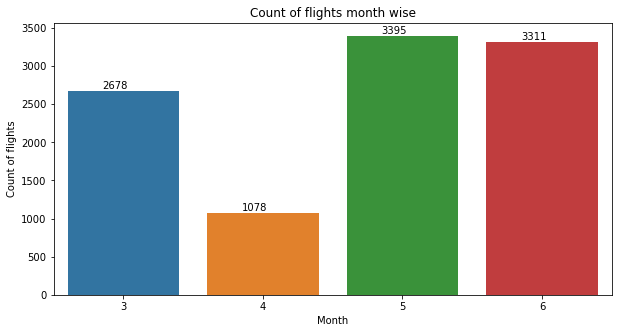

In [31]:
# Plotting Bar chart for Months (Duration) vs Number of Flights
plt.figure(figsize = (10, 5))
plt.title('Count of flights month wise')
ax=sns.countplot(x = 'Journey_month', data = train_df)
plt.xlabel('Month')
plt.ylabel('Count of flights')
for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x()+0.25, p.get_height()+1), va='bottom', color= 'black')

Inference: Here in the above graph we have plotted the count plot for journey in month vs number of flights and got to see that May has the most number of flights

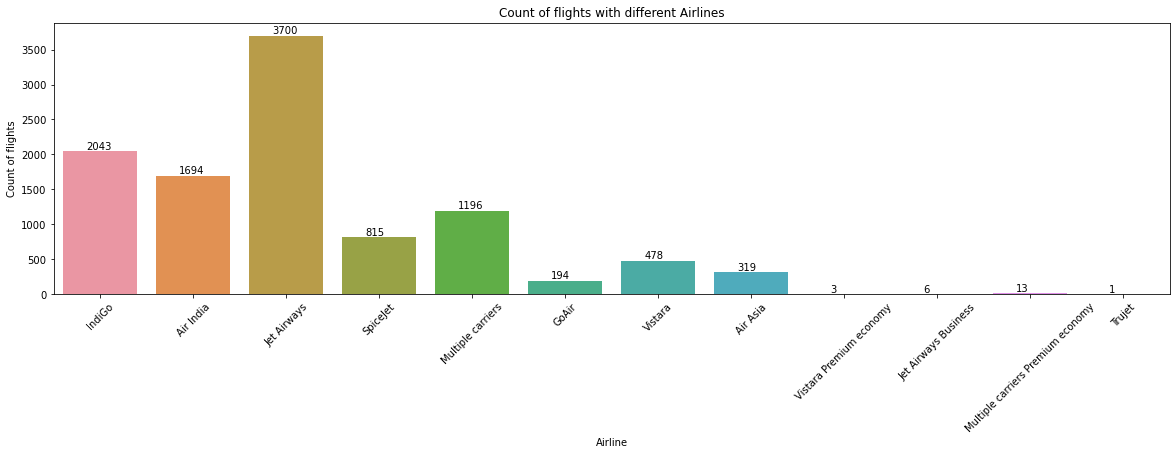

In [32]:
# Plotting Bar chart for Types of Airline vs Number of Flights
plt.figure(figsize = (20,5))
plt.title('Count of flights with different Airlines')
ax=sns.countplot(x = 'Airline', data =train_df)
plt.xlabel('Airline')
plt.ylabel('Count of flights')
plt.xticks(rotation = 45)
for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x()+0.25, p.get_height()+1), va='bottom', color= 'black')

Inference: Now from the above graph we can see that between the type pf airline and count of flights we can see that Jet airways has the most flight boarded. 

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

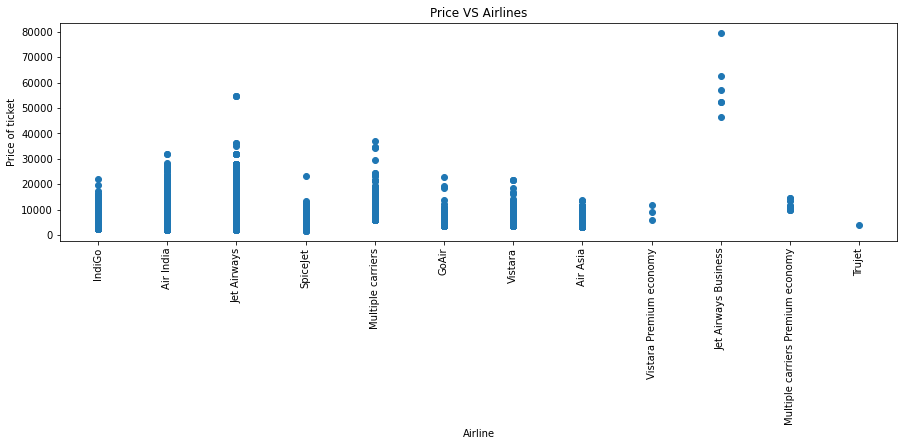

In [33]:
# Plotting Ticket Prices VS Airlines
plt.figure(figsize = (15,4))
plt.title('Price VS Airlines')
plt.scatter(train_df['Airline'], train_df['Price'])
plt.xticks
plt.xlabel('Airline')
plt.ylabel('Price of ticket')
plt.xticks(rotation = 90)

### Correlation between all Features

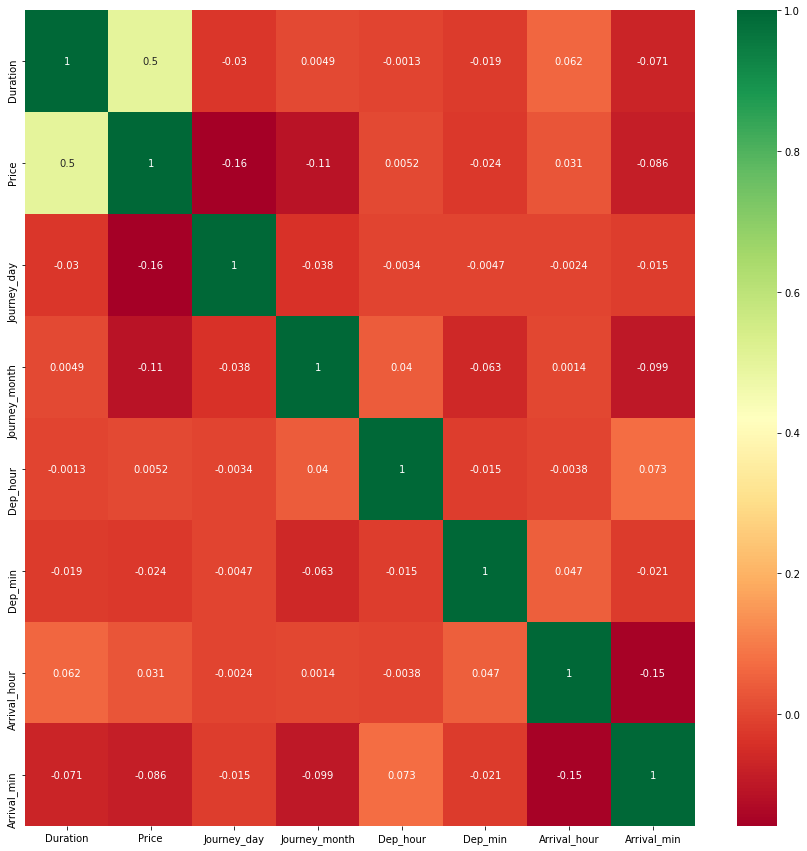

In [34]:
# Plotting Correation
plt.figure(figsize = (15,15))
sns.heatmap(train_df.corr(), annot = True, cmap = "RdYlGn")
plt.show()

In [35]:
# Dropping the Price
data = train_df.drop(["Price"], axis=1)

In [36]:
# Categorical Data and Numerical Data
train_categorical_data = data.select_dtypes(exclude=['int64', 'float','int32'])
train_numerical_data = data.select_dtypes(include=['int64', 'float','int32'])

test_categorical_data = test_df.select_dtypes(exclude=['int64', 'float','int32','int32'])
test_numerical_data  = test_df.select_dtypes(include=['int64', 'float','int32'])

In [37]:
train_categorical_data.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info


In [38]:
# Label Encode and Hot Encode for Categorical Columns
le = LabelEncoder()
train_categorical_data = train_categorical_data.apply(LabelEncoder().fit_transform)
test_categorical_data = test_categorical_data.apply(LabelEncoder().fit_transform)

In [39]:
train_categorical_data.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info
0,3,0,5,18,4,8
1,1,3,0,84,1,8
2,4,2,1,118,1,8
3,3,3,0,91,0,8
4,3,0,5,29,0,8


In [40]:
# Concatenating both Catagorical Data and Numerical Data
X = pd.concat([train_categorical_data, train_numerical_data], axis=1)
y = train_df['Price']
test_set = pd.concat([test_categorical_data, test_numerical_data], axis=1)
X.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Duration,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,3,0,5,18,4,8,170,24,3,22,20,1,10
1,1,3,0,84,1,8,445,1,5,5,50,13,15
2,4,2,1,118,1,8,1140,9,6,9,25,4,25
3,3,3,0,91,0,8,325,12,5,18,5,23,30
4,3,0,5,29,0,8,285,1,3,16,50,21,35


In [41]:
y.head()

0     3897
1     7662
2    13882
3     6218
4    13302
Name: Price, dtype: int64

In [42]:
# Calculating Mean Absolute Percentage Error
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

### Now we will be splitting out our dataset

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [44]:
print("The size of training input is", X_train.shape)
print("The size of training output is", y_train.shape)
print("The size of testing input is", X_test.shape)
print("The size of testing output is", y_test.shape)

The size of training input is (7323, 13)
The size of training output is (7323,)
The size of testing input is (3139, 13)
The size of testing output is (3139,)


### Model Building

### 1. Ridge Regression

In [45]:
# Performing GridSearchCV on Ridge Regression
params = {'alpha' : [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000, 100000]}
ridge_regressor = GridSearchCV(Ridge(), params, cv = 5, scoring = 'neg_mean_absolute_error', n_jobs = -1)
ridge_regressor.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=Ridge(), n_jobs=-1,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000,
                                   10000, 100000]},
             scoring='neg_mean_absolute_error')

In [46]:
# Predicting train and test results
y_train_pred = ridge_regressor.predict(X_train)
y_test_pred = ridge_regressor.predict(X_test)

In [47]:
print("Train Results for Ridge Regressor Model:")
print("Root Mean Squared Error: ", sqrt(mse(y_train.values, y_train_pred)))
print("Mean Absolute % Error: ", round(mean_absolute_percentage_error(y_train.values, y_train_pred)))
print("R-Squared: ", r2_score(y_train.values, y_train_pred))

Train Results for Ridge Regressor Model:
Root Mean Squared Error:  3558.667750232805
Mean Absolute % Error:  32
R-Squared:  0.4150529285926381


In [48]:
print("Test Results for Ridge Regressor Model:")
print("Root Mean Squared Error: ", sqrt(mse(y_test, y_test_pred)))
print("Mean Absolute % Error: ", round(mean_absolute_percentage_error(y_test, y_test_pred)))
print("R-Squared: ", r2_score(y_test, y_test_pred))

Test Results for Ridge Regressor Model:
Root Mean Squared Error:  3457.5985597925214
Mean Absolute % Error:  32
R-Squared:  0.42437171409958274


### 2. Lasso Regression

In [49]:
# Performing GridSearchCV on Lasso Regression
params = {'alpha' : [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000, 100000]}
lasso_regressor = GridSearchCV(Lasso(), params ,cv = 15,scoring = 'neg_mean_absolute_error', n_jobs = -1)
lasso_regressor.fit(X_train, y_train)

GridSearchCV(cv=15, estimator=Lasso(), n_jobs=-1,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000,
                                   10000, 100000]},
             scoring='neg_mean_absolute_error')

In [50]:
# Predicting train and test results
y_train_pred = lasso_regressor.predict(X_train)
y_test_pred = lasso_regressor.predict(X_test)

In [51]:
print("Train Results for Lasso Regressor Model:")
print("Root Mean Squared Error: ", sqrt(mse(y_train.values, y_train_pred)))
print("Mean Absolute % Error: ", round(mean_absolute_percentage_error(y_train.values, y_train_pred)))
print("R-Squared: ", r2_score(y_train.values, y_train_pred))

Train Results for Lasso Regressor Model:
Root Mean Squared Error:  3560.853987663486
Mean Absolute % Error:  32
R-Squared:  0.4143339932536655


In [52]:
print("Test Results for Lasso Regressor Model:")
print("Root Mean squared Error: ", sqrt(mse(y_test, y_test_pred)))
print("Mean Absolute % Error: ", round(mean_absolute_percentage_error(y_test, y_test_pred)))
print("R-Squared: ", r2_score(y_test, y_test_pred))

Test Results for Lasso Regressor Model:
Root Mean squared Error:  3459.384927631988
Mean Absolute % Error:  32
R-Squared:  0.4237767638929625


### 3. Decision Tree Regression

In [53]:
# Performing GridSearchCV on Decision Tree Regression
depth = list(range(3,30))
param_grid = dict(max_depth = depth)
tree = GridSearchCV(DecisionTreeRegressor(), param_grid, cv = 10)
tree.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14,
                                       15, 16, 17, 18, 19, 20, 21, 22, 23, 24,
                                       25, 26, 27, 28, 29]})

In [54]:
# Predicting train and test results
y_train_pred = tree.predict(X_train)
y_test_pred = tree.predict(X_test)

In [55]:
print("Train Results for Decision Tree Regressor Model:")
print("Root Mean squared Error: ", sqrt(mse(y_train.values, y_train_pred)))
print("Mean Absolute % Error: ", round(mean_absolute_percentage_error(y_train.values, y_train_pred)))
print("R-Squared: ", r2_score(y_train.values, y_train_pred))

Train Results for Decision Tree Regressor Model:
Root Mean squared Error:  560.9099093439073
Mean Absolute % Error:  3
R-Squared:  0.9854679156224377


In [56]:
print("Test Results for Decision Tree Regressor Model:")
print("Root Mean Squared Error: ", sqrt(mse(y_test, y_test_pred)))
print("Mean Absolute % Error: ", round(mean_absolute_percentage_error(y_test, y_test_pred)))
print("R-Squared: ", r2_score(y_test, y_test_pred))

Test Results for Decision Tree Regressor Model:
Root Mean Squared Error:  1871.5387049259973
Mean Absolute % Error:  9
R-Squared:  0.8313483417949448


In [57]:
ridge_score = round(ridge_regressor.score(X_train, y_train) * 100, 2)
ridge_score_test = round(ridge_regressor.score(X_test, y_test) * 100, 2)

lasso_score = round(lasso_regressor.score(X_train, y_train) * 100, 2)
lasso_score_test = round(lasso_regressor.score(X_test, y_test) * 100, 2)

decision_score = round(tree.score(X_train, y_train) * 100, 2)
decision_score_test = round(tree.score(X_test, y_test) * 100, 2)

### Comparing all the Models

In [58]:
# Comparing all the models
models = pd.DataFrame({
    'Model': [ 'Ridge Regression', 'Lasso Regression','Decision Tree Regressor'],
    'Score': [ ridge_score, lasso_score, decision_score],
    'Test Score': [ ridge_score_test, lasso_score_test, decision_score_test]})
models.sort_values(by='Test Score', ascending=False)

,Model,Score,Test Score
2,Decision Tree Regressor,98.55,83.13
1,Lasso Regression,-252062.50,-248119.29
0,Ridge Regression,-252539.70,-248538.03


In [60]:
# Training = Tr.
# Testing = Te.
x = PrettyTable()
x.field_names = ["Model Name", "Tr. RMSE", "Tr. MA%E", "Tr. R-Squared", "Te. RMSE", "Te. MA%E", "Te. R-Squared",]
x.add_row(['Ridge Regression','3558.67','32','0.42','3457.60','32','0.42'])
x.add_row(['Lasso Regression','3560.85','32','0.41','3459.38','32','0.42'])
x.add_row(['Decision Tree Regressor','853.54','06','0.97','1857.68','10','0.83'])
print(x)

+-------------------------+----------+----------+---------------+----------+----------+---------------+
|        Model Name       | Tr. RMSE | Tr. MA%E | Tr. R-Squared | Te. RMSE | Te. MA%E | Te. R-Squared |
+-------------------------+----------+----------+---------------+----------+----------+---------------+
|     Ridge Regression    | 3558.67  |    32    |      0.42     | 3457.60  |    32    |      0.42     |
|     Lasso Regression    | 3560.85  |    32    |      0.41     | 3459.38  |    32    |      0.42     |
| Decision Tree Regressor |  853.54  |    06    |      0.97     | 1857.68  |    10    |      0.83     |
+-------------------------+----------+----------+---------------+----------+----------+---------------+


### Conclusion

By comparing all the models (Ridge Regression, Lasso Regression, Decision Tree Regressor, Random Forest Regressor), we can conclude that Decision Tree Regressor and Random Forest Regressor performs the best.